# 정상성

## Differencing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# 5 years of monthly data (60 months)
months = np.arange(60)

# 1) Original seasonal data (trend + seasonality + noise)
seasonal_data = 10 + 0.1*months + 5 * np.sin(2 * np.pi * months / 12) + np.random.normal(0, 1, 60)

# 2) Seasonal differencing (12-month lag)
seasonal_diff = pd.Series(seasonal_data).diff(12)

# 3) Pure random noise (flat/pure stationary)
flat_data = np.random.normal(0, 1, 60)

In [2]:
print(seasonal_data[12] - seasonal_data[0])
print(seasonal_data[13] - seasonal_data[1])

0.9452481185547992
-0.575015943486612


In [3]:
seasonal_diff[:20]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12    0.945248
13   -0.575016
14   -1.172606
15   -0.885317
16    0.421322
17    1.748384
18   -1.287237
19   -0.979738
dtype: float64

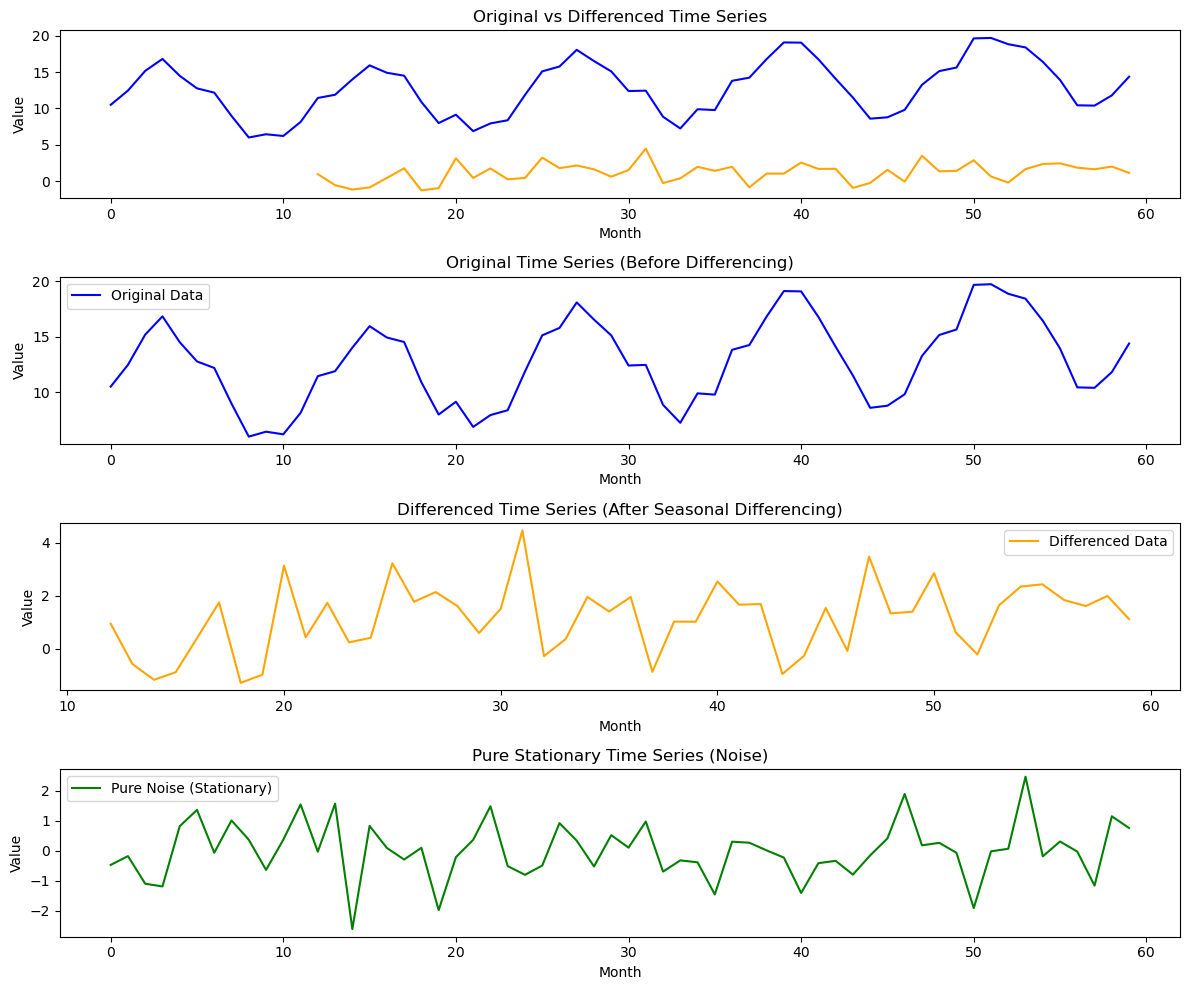

In [4]:
# Plot
plt.figure(figsize=(12, 10))

# 1) Original vs Differenced
plt.subplot(4,1,1)
plt.plot(months, seasonal_data, label='Original Data (Trend + Seasonality)', color='blue')
plt.plot(months, seasonal_diff, label='12-Month Seasonal Differencing', color='orange')
plt.title('Original vs Differenced Time Series')
plt.xlabel('Month')
plt.ylabel('Value')

# 2) Original (차분 전)
plt.subplot(4,1,2)
plt.plot(months, seasonal_data, label='Original Data', color='blue')
plt.title('Original Time Series (Before Differencing)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

# 3) Differenced (차분 후)
plt.subplot(4,1,3)
plt.plot(months, seasonal_diff, label='Differenced Data', color='orange')
plt.title('Differenced Time Series (After Seasonal Differencing)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

# 4) Pure Noise
plt.subplot(4,1,4)
plt.plot(months, flat_data, label='Pure Noise (Stationary)', color='green')
plt.title('Pure Stationary Time Series (Noise)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

## Smoothing - MA

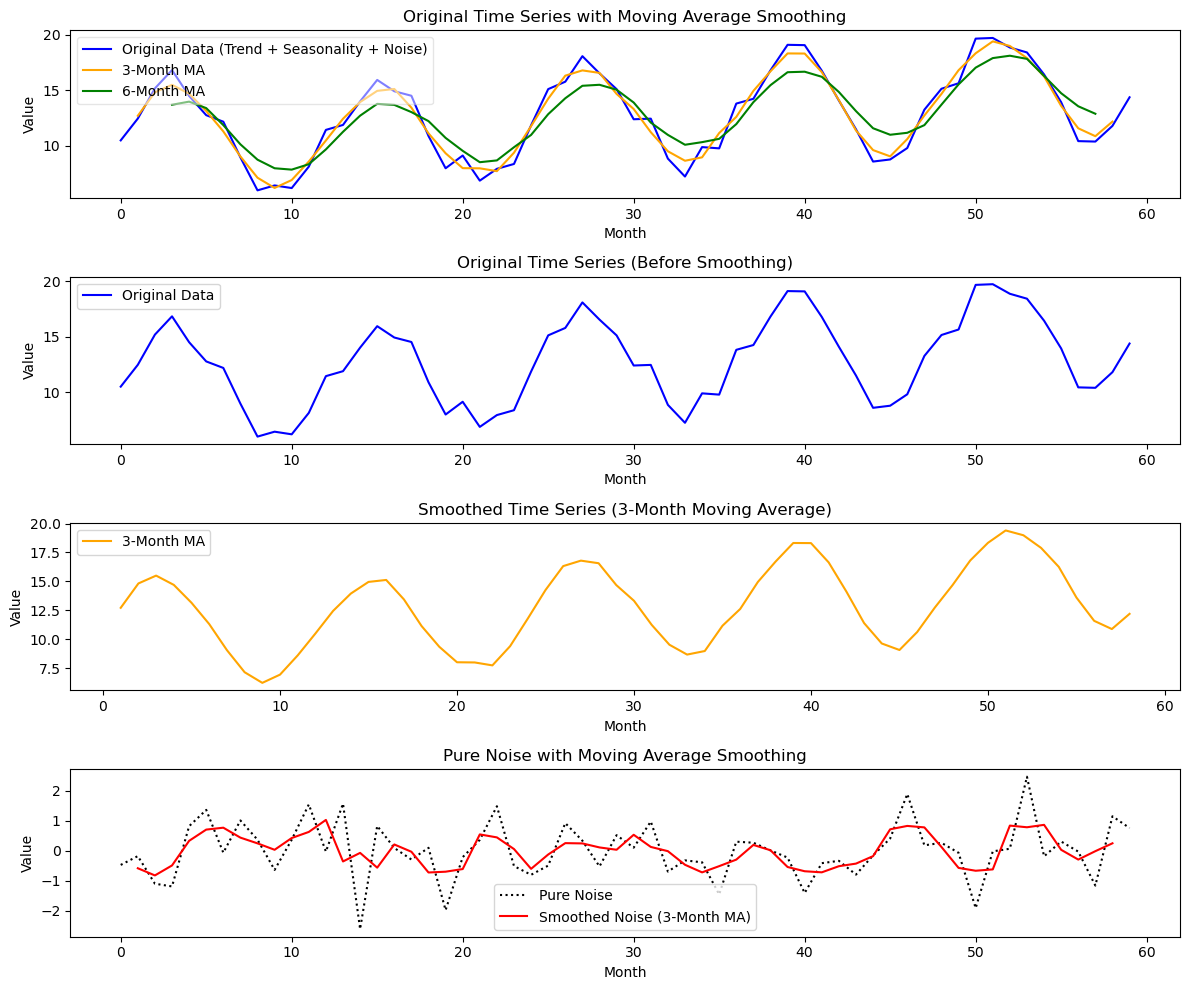

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# 5 years of monthly data (60 months)
months = np.arange(60)

# 1) Original seasonal data (trend + seasonality + noise)
seasonal_data = 10 + 0.1*months + 5 * np.sin(2 * np.pi * months / 12) + np.random.normal(0, 1, 60)
seasonal_series = pd.Series(seasonal_data)

# 2) Moving Average Smoothing
ma_3 = seasonal_series.rolling(window=3, center=True).mean()  # 3-month MA
ma_6 = seasonal_series.rolling(window=6, center=True).mean()  # 6-month MA

# 3) Pure random noise (flat/pure stationary)
flat_data = np.random.normal(0, 1, 60)
flat_series = pd.Series(flat_data)
flat_ma = flat_series.rolling(window=3, center=True).mean()

# Plot
plt.figure(figsize=(12, 10))

# 1) Original vs Moving Average (3,6 months)
plt.subplot(4,1,1)
plt.plot(months, seasonal_series, label='Original Data (Trend + Seasonality + Noise)', color='blue')
plt.plot(months, ma_3, label='3-Month MA', color='orange')
plt.plot(months, ma_6, label='6-Month MA', color='green')
plt.title('Original Time Series with Moving Average Smoothing')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(framealpha=0.5)

# 2) Original (Before Smoothing)
plt.subplot(4,1,2)
plt.plot(months, seasonal_series, label='Original Data', color='blue')
plt.title('Original Time Series (Before Smoothing)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

# 3) Smoothed (3-Month MA)
plt.subplot(4,1,3)
plt.plot(months, ma_3, label='3-Month MA', color='orange')
plt.title('Smoothed Time Series (3-Month Moving Average)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

# 4) Pure Noise + Smoothed
plt.subplot(4,1,4)
plt.plot(months, flat_series, label='Pure Noise', color='k', linestyle=':')
plt.plot(months, flat_ma, label='Smoothed Noise (3-Month MA)', color='red')
plt.title('Pure Noise with Moving Average Smoothing')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


## 공분산이 시차(lag)에만 의존해야 한다 (시점 자체에는 의존하지 않음)

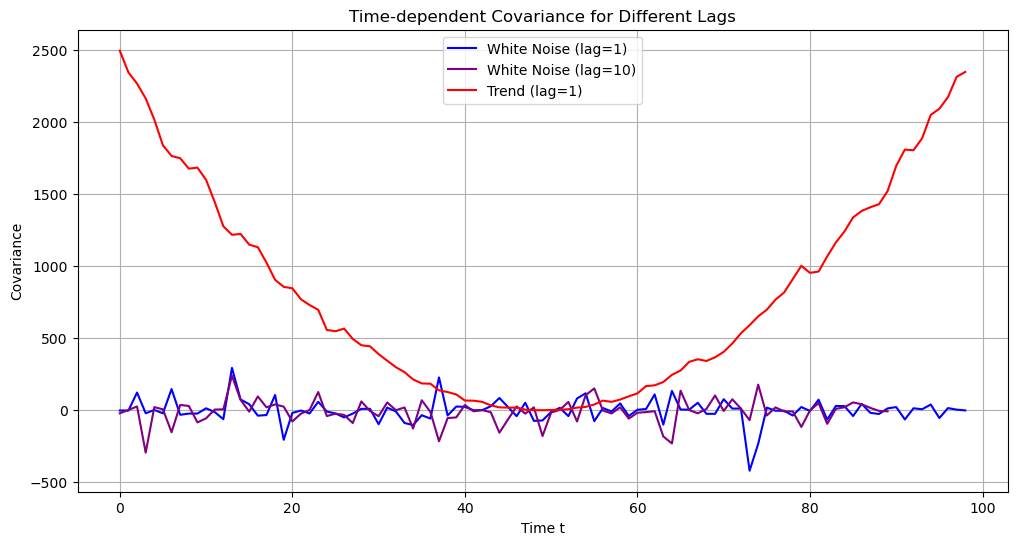

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100

# 시계열 생성
white_noise = np.random.normal(0, 10, n)
white_series = pd.Series(white_noise)

trend_series = pd.Series(np.arange(n) + np.random.normal(0, 1, n))

def t_cov(series, lag):
    """t별 공분산 계산 (lag 고정)"""
    covs = []
    for t in range(len(series)-lag):
        X = series[t]
        Y = series[t + lag]
        covs.append((X - series.mean()) * (Y - series.mean()))
    return covs

# t별 공분산 계산
cov_white_lag1 = t_cov(white_series, lag=1)
cov_white_lag10 = t_cov(white_series, lag=10)
cov_trend_lag1 = t_cov(trend_series, lag=1)

t_values_lag1 = np.arange(len(cov_white_lag1))
t_values_lag10 = np.arange(len(cov_white_lag10))

# Plot
plt.figure(figsize=(12,6))
plt.plot(t_values_lag1, cov_white_lag1, label='White Noise (lag=1)', color='blue')
plt.plot(t_values_lag10, cov_white_lag10, label='White Noise (lag=10)', color='purple')
plt.plot(t_values_lag1, cov_trend_lag1, label='Trend (lag=1)', color='red')
plt.xlabel('Time t')
plt.ylabel('Covariance')
plt.title('Time-dependent Covariance for Different Lags')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 100
lags = [1, 2, 5, 10]

# 1) White noise (stationary)
white_noise = np.random.normal(0, 1, n)
white_series = pd.Series(white_noise)

print('White Noise Covariances (depend only on lag):')
for lag in lags:
    X = white_series[:-lag]
    Y = white_series[lag:]
    cov = np.cov(X, Y, ddof=1)[0,1]
    print(f"Lag={lag}: covariance = {cov:.3f}")

# 2) Non-stationary trend
trend = np.arange(n) + np.random.normal(0, 1, n)
trend_series = pd.Series(trend)

print('\nNon-Stationary Trend Covariances (depend on time as well as lag):')
for lag in lags:
    X = trend_series[:-lag]
    Y = trend_series[lag:]
    cov = np.cov(X, Y, ddof=1)[0,1]
    print(f"Lag={lag}: covariance = {cov:.3f}")

White Noise Covariances (depend only on lag):
Lag=1: covariance = -0.018
Lag=2: covariance = -0.034
Lag=5: covariance = 0.169
Lag=10: covariance = -0.087

Non-Stationary Trend Covariances (depend on time as well as lag):
Lag=1: covariance = 825.122
Lag=2: covariance = 808.418
Lag=5: covariance = 759.450
Lag=10: covariance = 683.548


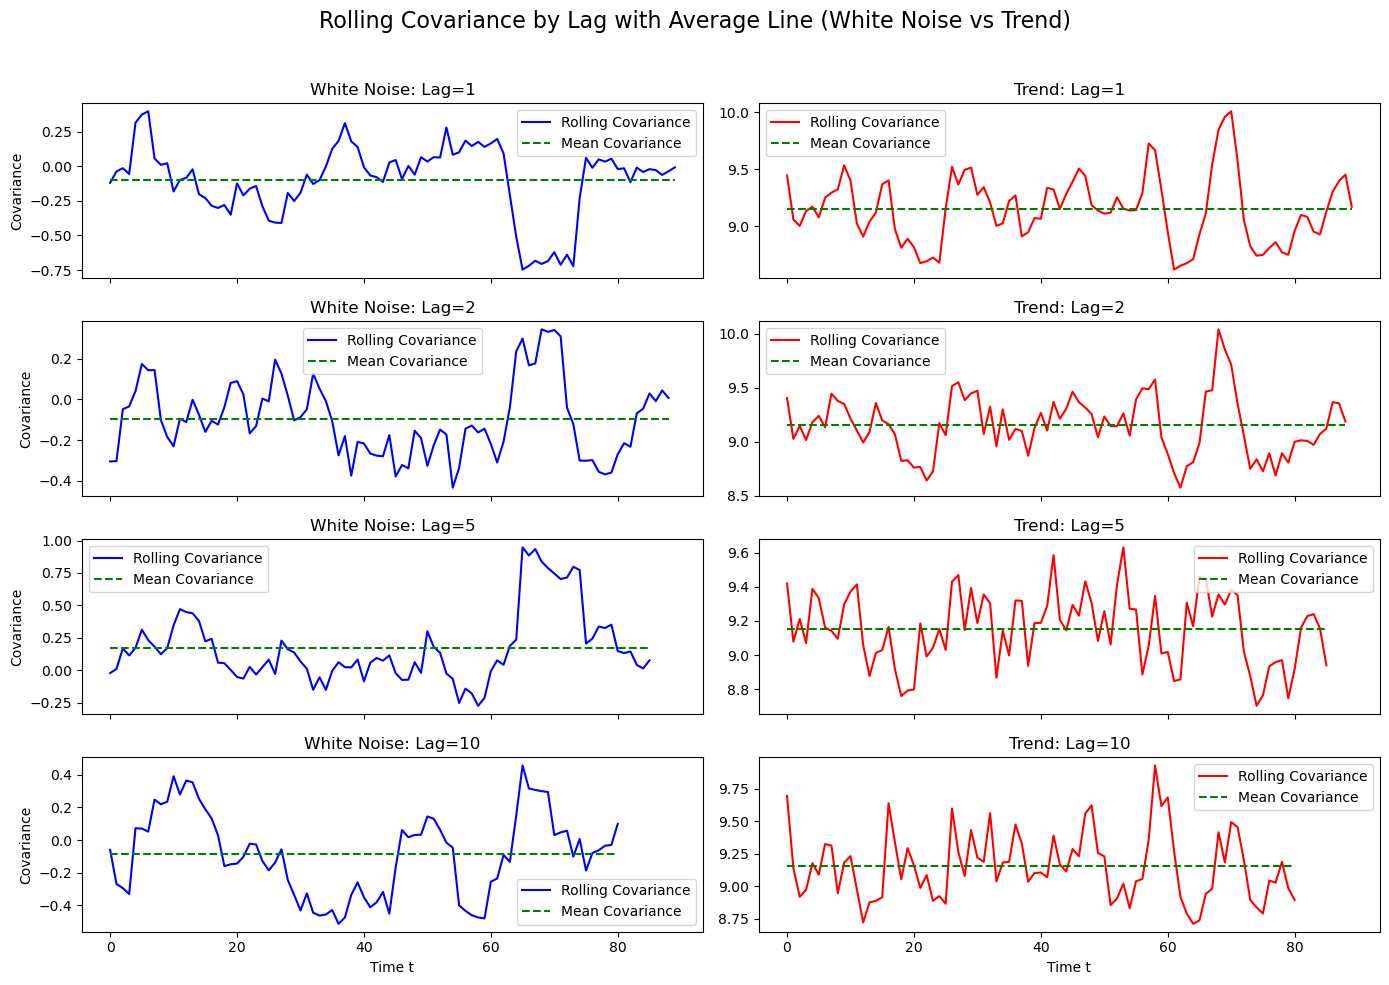

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100
lags = [1, 2, 5, 10]
window = 10  # 공분산 계산용 rolling window 길이

# 1) White Noise (stationary)
white_series = pd.Series(np.random.normal(0, 1, n))

# 2) Non-Stationary Trend (노이즈를 줄임)
trend_series = pd.Series(np.arange(n) + np.random.normal(0, 0.2, n))

# 함수: 시점별 공분산 계산 (rolling window 사용)
def rolling_cov(series, lag, window):
    covs = []
    for t in range(len(series) - lag - window + 1):
        X = series[t:t+window]
        Y = series[t+lag:t+lag+window]
        cov = np.cov(X, Y, ddof=1)[0,1]
        covs.append(cov)
    return np.array(covs)

# 시각화
fig, axes = plt.subplots(len(lags), 2, figsize=(14, 10), sharex=True)
fig.suptitle('Rolling Covariance by Lag with Average Line (White Noise vs Trend)', fontsize=16)

for i, lag in enumerate(lags):
    # White Noise
    cov_white = rolling_cov(white_series, lag, window)
    axes[i,0].plot(cov_white, color='blue', label='Rolling Covariance')
    axes[i,0].hlines(cov_white.mean(), 0, len(cov_white)-1, colors='green', linestyles='--', label='Mean Covariance')
    axes[i,0].set_title(f"White Noise: Lag={lag}")
    axes[i,0].set_ylabel("Covariance")
    axes[i,0].legend()
    
    # Trend
    cov_trend = rolling_cov(trend_series, lag, window)
    axes[i,1].plot(cov_trend, color='red', label='Rolling Covariance')
    axes[i,1].hlines(cov_trend.mean(), 0, len(cov_trend)-1, colors='green', linestyles='--', label='Mean Covariance')
    axes[i,1].set_title(f"Trend: Lag={lag}")
    axes[i,1].legend()
    
axes[-1,0].set_xlabel('Time t')
axes[-1,1].set_xlabel('Time t')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()